In [21]:
from pathlib import Path
import os
import sisl
import sisl.viz
import numpy as np
from ase.build import molecule

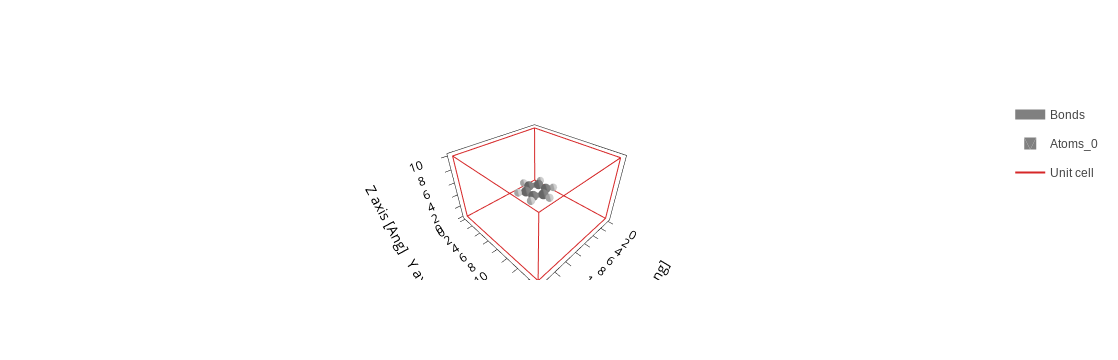

In [22]:
atoms = molecule('C6H6', vacuum = 5)
benzene = sisl.Geometry.new(atoms)
benzene.plot(axes='xyz')

In [33]:
inputs = Path('inputs')
results = Path('results')
siesta = '/opt/anaconda3/envs/nanociencia/bin/siesta'

In [34]:
benzene.write(inputs/'geom.fdf')

In [35]:
with open(inputs/'RUN.fdf', 'w') as f:
    f.write('%include geom.fdf \n')
    f.write('TS.HS.Save true')

In [36]:
os.system(f'cd {results}; {siesta} RUN.fdf > RUN.out')

Job completed


0

In [69]:
H = sisl.get_sile(results/"RUN.fdf").read_hamiltonian()
geom = sisl.get_sile(results/"RUN.fdf").read_geometry()

In [38]:
eigenstates = H.eigenstate()
eigenstates.eig

array([-16.85584921, -14.0856129 , -14.08561174, -10.53069213,
       -10.53054227,  -8.65691373,  -6.88636117,  -6.66710033,
        -5.94719358,  -5.94660128,  -4.7629345 ,  -3.947479  ,
        -3.9472216 ,  -2.0336825 ,  -2.0335716 ,   3.17039698,
         3.17043392,   6.11502598,   7.11138195,   7.63003778,
         7.63105022,   8.40580666,   8.40584601,   9.16184149,
        11.24458368,  11.24516225,  11.43573032,  11.43615096,
        11.82269438,  12.22032039,  12.44676789,  14.53391452,
        14.534041  ,  15.05254152,  15.05304262,  15.49873408,
        16.05283721,  16.05462092,  16.98877124,  17.24325958,
        17.47766281,  17.47772598,  18.04618741,  19.26995222,
        19.89849062,  21.96329687,  21.96476612,  22.06533538,
        22.06778255,  22.08878172,  22.08900384,  23.82259741,
        23.82262539,  24.69043576,  24.9404016 ,  24.94327857,
        25.9243249 ,  26.8633256 ,  26.8666338 ,  27.21287037,
        27.50885201,  28.22176221,  28.22599683,  29.59

In [72]:
def LDOS_grid(H, V):
    grida = sisl.Grid((100, 100, 100), geometry=geom)
    eigenstates = H.eigenstate()
    gridb = sisl.Grid((100, 100, 100), geometry=geom)
    for i in eigenstates:
        if i.eig <= V and >0:
            gridb.fill(0)
            wf = i.wavefunction(gridb)
            DP = gridb * gridb
            grida = grida + DP
    return grida

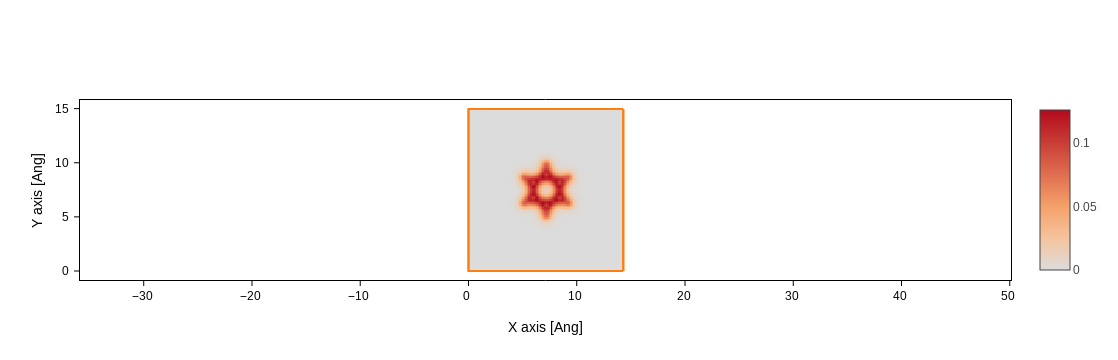

In [71]:
LDOS_grid(H, 1).plot(axes='xy')

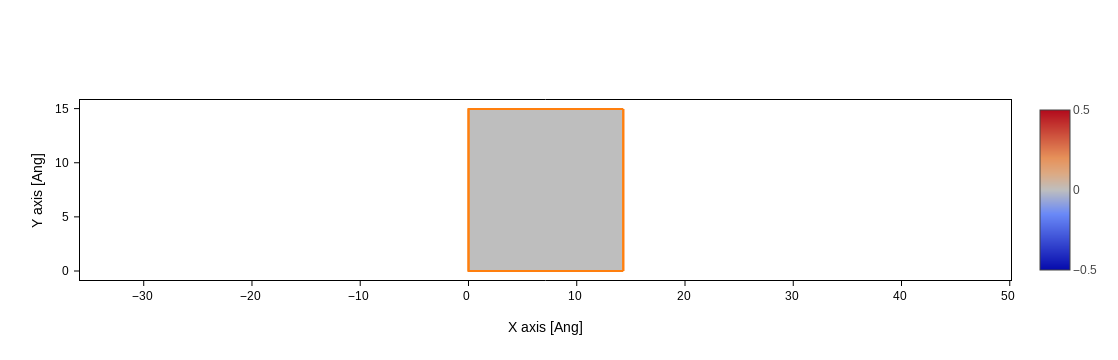

In [83]:
grida = sisl.Grid((100, 100, 100), geometry=benzene)
gridb = sisl.Grid((100, 100, 100), geometry=benzene)
for eigen in eigenstates:
    if eigen.eig <= 1:
        if eigen.eig >=0:
            gridb.fill(0)
            wf = eigen.wavefunction(gridb)
            conj = gridb * gridb
            grida = grida + conj
grida.plot(axes='xy')